In [307]:
#Data collection, save in CSV file
import tweepy
import csv
import time
from datetime import datetime
from datetime import timedelta


consumer_key = "wJvckQyRGO9j6IP1HLEqKHy2T"
consumer_secret = "vgActfGgy0UCGR5OGSGRNPiX75jIeXlNGpTtFsqStVjIY6EiIR"
access_token = "150884743-9FLqDlzvx6FFxZvhms2m4CItsFR2ANcJR4liz1HI"
access_token_secret = "Epn0ZK4uF13BMEkyIZqk7KToeXkymOl7yVG5gCNutRsFQ"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

yesterday = (datetime.now() + timedelta(days=-1)).strftime("%Y-%m-%d")
csvFile = open('IMUNISASI/imunisasi_tweet_'+yesterday+'.csv', 'a')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["id","created_at","text","time_zone","place","coordinates","location","user_name","screen_name","retweet_count","favourite_count"])

for tweet in tweepy.Cursor(api.search,q="'imunisasi OR vaksin OR vaksinasi' -filter:retweets",count=10000,lang="id",since=yesterday,tweet_mode='extended').items():
                
    if(tweet.created_at.date() < datetime.now().date()) :
        print (tweet.full_text.encode('unicode escape')) 
        csvWriter.writerow([tweet.id,
                            tweet.created_at,
                            tweet.full_text.encode('utf-8'),
                            tweet.user.time_zone,
                            tweet.place, 
                            tweet.coordinates,
                            tweet.user.location.encode('utf-8'),
                            tweet.user.name.encode('utf-8'),
                            tweet.user.screen_name.encode('utf-8'),
                            tweet.retweet_count,
                            tweet.favorite_count
                           ])

b'@putraseagull Ko kalo diliat liat yah mukanya kaya adi nugroho yg suaminya donita itu loh\\U0001f923\\U0001f923\\U0001f602 yg iklan imunisasi \\U0001f62d\\U0001f44c\\U0001f44c'
b'Mau Rasa Apa Suntiknya? Rasa Mangga aja Om [ BIAS : Bulan Imunisasi Anak... https://t.co/mL45nBFZvY via @YouTube'
b'Tadi malem aku mimpi di imunisasi.\\U0001f629'
b'@aisyahusmann iya isinya emak2 dan anak2 kek mo ngantri imunisasi'
b'@dya_11677 @VIVAcoid Dan lu kurang imunisasi ya,maka nya aga kurang masuk ke otak anda apa yang di omongin sama dia ? Hahahha kasian'
b'Kalau berkemampuan cucuk la segala extra vaccines yang ada.  Next baby nak ambik vaksin rotavirus. Diorg ni akan make a point cucuk vaksin pneumococcal sooon. Ada je penghalang. Plan this weekend. Adam pulak tak sihat.'
b'@ServiceGenteng @fendi_wcksn95 @kompascom Eh iya buat prefentif...\\n\\nUdah baca beritanya? Ada dua kelompok uji, kontrol dan eksperimen.\\nYg eksperimen disuntik vaksin, yg kontrol disuntik bukan vaksin plasebo gitu deh.\\n\\

b'@jo0chan Asalkan kamu gak meriang atau demam tinggi? Sebenernya klo udah di gigit gitu harus vaksin sih..'
b'Vaksinasi berguna untuk menjaga kesehatan kucing dan menghindari dari berbagai penyakit.'
b'Sepertinya saya harus imunisasi campak, \\nAgar tidak sering di Campak-an..'
b'@claustrophobixx wkwk udh vaksin belom kamutuu'
b'@bernardls Iya, kemarin mau vaksin eh pilek. Baru obat cacing aja jadinya'
b'@KenHideki Haha iya baru boleh mandi setelah 4 bulan dan vaksin pertama'
b'Dan kalo ternyata imunisasi di bidan efeknya segitunya, pasti balik lagi ke hermina haha. Walopun lumayan di atas sejuta tiap vaksin tiap bulan pula, tp kalo sama sekali ngga ada efek demam dll yaa worth it \\U0001f602'
b'Jadi kemaren abis vaksin alias imunisasi di rs Hermina. Lumayan lah harganya, tapi abis itu sama sekali ngga demam ngga rewel dan ngga ada efek apapun. Dan bulan depan mau coba imunisasi di bidan, yang hampir pasti bakal demam. Deg-degannya dari sekarang wkwk.'
b'@claustrophobixx tp udah vaksi

b'Dulu pas sd klo imunisasi dapet kacang ijo. Skrg tes darah kok gak dapet kacang ijo jg ya :('
b'@izudinenchelon Common reason terpengaruh dgn dakyah tak nak ada chemical content something like that dlm body anak, vaksin asal dr yahudi so CuBaAN hAlUs PuAk YaHuDi NaK bUnUh uMaT IsLaM n.............nabi Muhammad DuLu PoN tAk VaKsIn kEnApA kItA nAk VaKsIn \\U0001f481\\U0001f3fb\\u200d\\u2642\\ufe0f'
b'@Jijieapplepie Serious lah. Tapi tulah. Mostly kt malaysia yang tolak vaksin berketayap :/'
b'Babinsa Desa Doplang Koramil 04/Teras menampingi kegiatan BIAS ( Bulan Imunisasi Anak Sekolah) Imunisasi Campak, oleh Tim BIAS dari Puskemas Teras. https://t.co/hAPl4TeFxz'
b'Vaksin menyerbu semua bagian tubuh melawan virus'
b'@digeeembok Vaksin comberan \\U0001f602\\U0001f602'
b'Semalam tanya bf kalau ada anak nanti dia bagi vaksin tak? Terus dia jawab "mestilah. Gila taknak vaksin!". Terus aku cakap okay boleh kahwin \\U0001f602  lepastu dia tanya aku percaya bumi ni flat ke tak? Aku jawab tak. 

In [27]:
import pandas as pd
import nltk
from nltk.stem.porter import *
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import requests
import json
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from googletrans import Translator
translator = Translator()

In [28]:
#MENAMBHAKAN SENTIMEN VADER
def sentiment_analyzer_scores(text, engl=True):
    if engl:
        trans = text
    else:
        trans = translator.translate(text).text

    score = analyser.polarity_scores(trans)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1

In [29]:
import seaborn as sns
def anl_tweets(lst, title='Tweets Sentiment', engl=False ): #engl = False karena pake bahasa indonesia
    sents = []
    for tw in lst:
        try:
            st = sentiment_analyzer_scores(tw, engl)
            sents.append(st)
        except:
            sents.append(0)
    ax = sns.distplot(
        sents,
        kde=False,
        bins=3)
    ax.set(xlabel='Negative                Neutral                 Positive',
           ylabel='#Tweets',
          title="Tweets of @"+title)
    return sents

In [206]:
#READ DATA
file_name = 'IMUNISASI/imunisasi_tweet_2019-08-19.csv'
file_name.encode()
df_tws = pd.read_csv(file_name)
df_tws.shape
df_tws.head()

,id,created_at,text,time_zone,place,coordinates,location,user_name,screen_name,retweet_count,favourite_count
0,id,created_at,text,time_zone,place,coordinates,location,user_name,screen_name,retweet_count,favourite_count
1,1163600958753923073,2019-08-19 23:57:41,b'~FEMALE SOLD\n\xe2\x9d\xa4\xef\xb8\x8f\xe2\x...,NaN,NaN,NaN,"b'Mengwi,badung,bali'",b'IWynSuranadiMuliana',b'mul_nick',0,0
2,1163600214025887745,2019-08-19 23:54:44,b'@feeqanadia Hahahaha parents refuse anak sat...,NaN,NaN,NaN,b'',b'Iqah',b'rafiqahramli',0,0
3,1163600041807765504,2019-08-19 23:54:03,b'Wei gerfren i antivax. Perlu tak aku vaksin ...,NaN,NaN,NaN,b'',b'Lucy',b'Luciferrrrrrrr',1,3
4,1163599198261936128,2019-08-19 23:50:42,b'@kangdede78 @CCICPolri @PDI_Perjuangan Nongo...,NaN,NaN,NaN,b'Jabar',b'Uto Wirdow',b'utowirdow',0,0


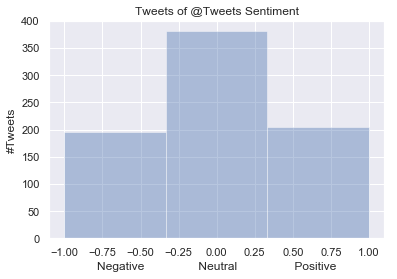

In [183]:
#ANALYZE: sentimen vader , tambah kolom sent_vader
df_tws['sent_vader'] = anl_tweets(df_tws.text)

In [313]:
#extract EMOJI
#emoji extract
def split_count(text):
    #text.decode('unicode-escape')
    emoji_list = []
    #data = regex.findall(r'\X', text)
    data = regex.findall(r'[^\x00-\x7F]+',text)
    flags = regex.findall(u'[\U0001F1E6-\U0001F1FF]', text) 
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

line = [b'Abis vaksin anjjjj gabisa tidur madep kiri ya Allah:((((( maen hp aja sakit lengannya \xf0\x9f\x98\xad AUG 27\xf0\x9f\xa6\x8b']
a=str(line[0],'utf-8')
counter = split_count(a)
emoji_all = ','.join(emoji for emoji in counter)
print(emoji_all)
print(emoji_all.encode('utf-8'))

😭,🦋
b'\xf0\x9f\x98\xad,\xf0\x9f\xa6\x8b'


In [314]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

HT_all = hashtag_extract(df_tws['text'])
#print(HT_all)
HT_all = sum(HT_all,[])
print(HT_all)

['pugloversclub', 'pugpuppies', 'pugbali', 'pugbalilover', 'hepatitisB', 'silentkiller', 'hepatitisB', 'knowtherisk', 'protectyourself', 'vaksin', 'vaksinhepatitisb', 'TangkapAbuJanda', 'Visi', 'Kesehatan', 'Imunisasi', 'Visi', 'Kesehatan', 'Imunisasi', 'Vaksin', 'Visi', 'Kesehatan', 'Imunisasi', 'Vaksin', 'hacked', 'bodohamat', 'uniklinikshahalam', 'uniklinikseksyen13', 'klinikshahalam', 'clinicshahalam', 'tekanandarah', 'diabetes', 'bloodpressuremonitoring', 'glucosemonitoring', 'homescreening', 'uniklinikdrrugaiyah', 'klinikshahalam', 'pemeriksaankesihatan', 'ultrasound', 'scanibumengandung', 'perkhidmatansunat', 'vaksin', 'KlinikDrRugaiyah', 'kaltimexpo2019', 'upsussiwab', 'kaltimberdaulat', 'Malaysia', 'children', 'malaysianow', 'news', 'DzulkeflyAhmad', 'Malay', 'Malaypolitics', 'Government', 'toddlers', 'vaccination', 'PolriUntukIndonesia74', 'StopPelanggaranStopKecelakaanKeselamatanUntukKemanusiaan', 'seriussangeneeh', 'Blog', 'HappyBlogging', 'sdmunggulindonesiamaju', 'Sahabat

In [311]:
#emoji free text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
def clean_tweets(tweet):
    
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)
    #tweet = re.sub("""[\s"'#]+\w+""",' ', tweet)
    tweet = emoji_pattern.sub(r'', tweet)
    
    # remove twitter Return handles (RT @xxx:)
    tweet = np.vectorize(remove_pattern)(tweet, "RT @[\w]*:")
    # remove URL links (httpxxx)
    tweet = np.vectorize(remove_pattern)(tweet, "https?://[A-Za-z0-9./]*")
    # remove special characters, numbers, punctuations (except for #)
    tweet = np.core.defchararray.replace(tweet, "[^a-zA-Z#]", " ")
    # remove special characters enter \n
    tweet = np.core.defchararray.replace(tweet, "\n", " ")
    # remove special characters b'
    #tweet = np.core.defchararray.replace(tweet, "b'", "")

    return tweet

line = [b'Abis vaksin anjjjj gabisa tidur madep kiri ya Allah:((((( maen hp aja sakit lengannya \xf0\x9f\x98\xad AUG 27\xf0\x9f\xa6\x8b']
a=str(line[0],'utf-8')
print(clean_tweets(a))

Abis vaksin anjjjj gabisa tidur madep kiri ya Allah((((( maen hp aja sakit lengannya   AUG 27 


In [265]:
#DATA CLEANING, tambah kolom text_clean
df_tws['text_clean'] = clean_tweets(df_tws.text)
df_tws.head()

TypeError: cannot use a string pattern on a bytes-like object

['pugloversclub', 'pugpuppies', 'pugbali', 'pugbalilover', 'hepatitisB', 'silentkiller', 'hepatitisB', 'knowtherisk', 'protectyourself', 'vaksin', 'vaksinhepatitisb', 'TangkapAbuJanda', 'Visi', 'Kesehatan', 'Imunisasi', 'Visi', 'Kesehatan', 'Imunisasi', 'Vaksin', 'Visi', 'Kesehatan', 'Imunisasi', 'Vaksin', 'hacked', 'bodohamat', 'uniklinikshahalam', 'uniklinikseksyen13', 'klinikshahalam', 'clinicshahalam', 'tekanandarah', 'diabetes', 'bloodpressuremonitoring', 'glucosemonitoring', 'homescreening', 'uniklinikdrrugaiyah', 'klinikshahalam', 'pemeriksaankesihatan', 'ultrasound', 'scanibumengandung', 'perkhidmatansunat', 'vaksin', 'KlinikDrRugaiyah', 'kaltimexpo2019', 'upsussiwab', 'kaltimberdaulat', 'Malaysia', 'children', 'malaysianow', 'news', 'DzulkeflyAhmad', 'Malay', 'Malaypolitics', 'Government', 'toddlers', 'vaccination', 'PolriUntukIndonesia74', 'StopPelanggaranStopKecelakaanKeselamatanUntukKemanusiaan', 'seriussangeneeh', 'Blog', 'HappyBlogging', 'sdmunggulindonesiamaju', 'Sahabat

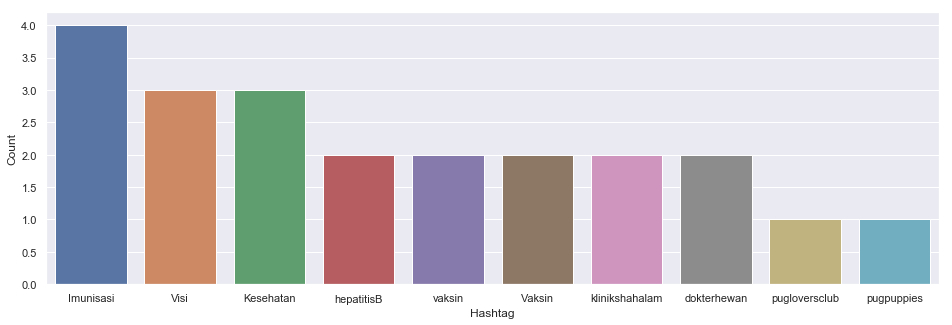

In [291]:
# collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

HT_all = hashtag_extract(df_tws['text'])
#print(HT_all)
HT_all = sum(HT_all,[])
print(HT_all)

#show bar plot
a = nltk.FreqDist(HT_all)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [23]:
#VISUALISASI
#WORD CLOUD
word_cloud(df_tws.text)
# Words in negative tweets
tws_pos = df_tws['text'][df_tws['sent_vader'] == -1]
word_cloud(tws_pos)

[]


In [ ]:
#PREPROCESSING
import re
import string
import csv

file_data_normalisasi ="C:/anmedsos/proyek/normalisasi.csv"
file_data_asli ="C:/anmedsos/proyek/data_awal.csv"
file_data_preprocessing ="C:/anmedsos/proyek/data_preprocessing.csv"


from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stopwords_factory = StopWordRemoverFactory()
stopword = stopwords_factory.create_stop_word_remover()
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
reader = csv.reader(open(file_data_normalisasi, 'r')) #Sumber : Rinaldo (2016)
data_asli = csv.reader(open(file_data_asli, 'r'))
fw = open(file_data_preprocessing, 'a')

d = {}
for row in reader :
    k,v = row
    k = k.lower()
    v = v.lower()
    d[k] = v
pat = re.compile(r"\b(%s)\b" % "|".join(d))
for row in data_asli :
#===================================NORMALISASI KATA===========================
    print("Teks Asli :"+str(row))
    text = str(row).lower()
    text = pat.sub(lambda m: d.get(m.group()), text)
    print("Proses Normalisasi :"+text)
    
    #text = text.encode('ascii', 'ignore').decode('ascii')
    #print("Penghilangan EMOJI :"+text) 
    #text=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
    #text = re.sub(emoji_pattern, '', text, flags=re.MULTILINE)
    #print("Penghilangan EMOJI :"+text)
#==============================MENGHILANGKAN HASHTAG=======================
    #pattern = '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)' #ini kode yang diubah
    #text = re.sub(pattern,'',text, flags=re.MULTILINE)
    #print("Penghilangan Username dan Hashtag :"+text)
#===================================MENGHILANGKAN URL===========================
    pattern = r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'
    text = re.sub(pattern,'',text, flags=re.MULTILINE)
    print("Penghilangan URL :"+text)
#=======================MENGHILANGKAN TANDA BACA===========================
    remove = string.punctuation
    kd = ' '.join(word.strip(remove) for word in text.split())
    text = kd
    print("Penghilangan Tanda Baca :"+text)
    
#===================================MENGHILANGKAN STOPWORDS===========================
    text = stopword.remove(text)
    print("Stopword :"+text)
#===================================PROSES STEMMING===========================
    text = stemmer.stem(text)
    print("Stemming :"+text)
    
    fw.write(text+"\n")
fw.close()